In [48]:
# Dependencies and Setup (dont need most of these for now)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import scipy.stats as st
from scipy.stats import linregress
from matplotlib.ticker import ScalarFormatter


In [49]:
# get tsa data

data_file = "resources/travel.csv"
tsa_df = pd.read_csv(data_file)[::-1]
del tsa_df["Day of Week"]
tsa_df["Date"] = pd.to_datetime(tsa_df["Date"])
tsa_df

day = 1
week = ""

for index, row in tsa_df.iterrows():
    
    tsa_df.loc[index, "Percent Change in Traveler Throughput"] = (row["2020 Traveler Throughput"] - row["2019 Traveler Throughput"]) / row["2019 Traveler Throughput"] * 100
    
    if day == 1:
        week = row["Date"]
        tsa_df.loc[index, "First Day of the Week"] = week
        day = day + 1
    elif day == 7:
        tsa_df.loc[index, "First Day of the Week"] = week
        day = 1
    else:
        tsa_df.loc[index, "First Day of the Week"] = week
        day = day + 1
        
tsa_df

,Date,2020 Traveler Throughput,2019 Traveler Throughput,Percent Change in Traveler Throughput,First Day of the Week
305,2020-03-01,2280522,2301439,-0.908866,2020-03-01
304,2020-03-02,2089641,2257920,-7.452833,2020-03-01
303,2020-03-03,1736393,1979558,-12.283803,2020-03-01
302,2020-03-04,1877401,2143619,-12.419091,2020-03-01
301,2020-03-05,2130015,2402692,-11.348812,2020-03-01
...,...,...,...,...,...
4,2020-12-27,1284599,2575985,-50.131736,2020-12-27
3,2020-12-28,1111751,2500396,-55.537003,2020-12-27
2,2020-12-29,1019347,2009880,-49.283191,2020-12-27
1,2020-12-30,1163696,2133253,-45.449696,2020-12-27


In [50]:
# get covid data

data_file = "resources/covid_cases.csv"
covid_df = pd.read_csv(data_file)[::-1]
covid_df["Date"] = pd.to_datetime(covid_df["Date"])
covid_df

day = 1
week = ""

for index, row in covid_df.iterrows():
    
    if day == 1:
        week = row["Date"]
        covid_df.loc[index, "First Day of the Week"] = week
        day = day + 1
    elif day == 7:
        covid_df.loc[index, "First Day of the Week"] = week
        day = 1
    else:
        covid_df.loc[index, "First Day of the Week"] = week
        day = day + 1
        
covid_df



,Date,New Cases,7-Day Moving Avg,First Day of the Week
305,2020-03-01,6,2,2020-03-01
304,2020-03-02,25,6,2020-03-01
303,2020-03-03,24,9,2020-03-01
302,2020-03-04,22,12,2020-03-01
301,2020-03-05,62,21,2020-03-01
...,...,...,...,...
4,2020-12-27,146593,181374,2020-12-27
3,2020-12-28,177814,180400,2020-12-27
2,2020-12-29,201428,181102,2020-12-27
1,2020-12-30,230982,181279,2020-12-27


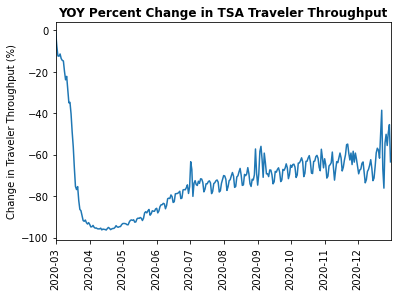

<Figure size 432x288 with 0 Axes>

In [51]:
# plot year change

x = tsa_df["Date"]
y = tsa_df["Percent Change in Traveler Throughput"]


plt.plot(x,y)
plt.xticks(rotation = "vertical")
plt.title("YOY Percent Change in TSA Traveler Throughput",fontsize=12, fontweight="bold")
plt.xlim(min(x), max(x))
plt.ylabel("Change in Traveler Throughput (%)")
plt.show()

plt.savefig("exports/percentchange.png")


Correlation coefficent between two y variables: 0.20871181824427923
0.20871181824427912
0.0002363685582474945


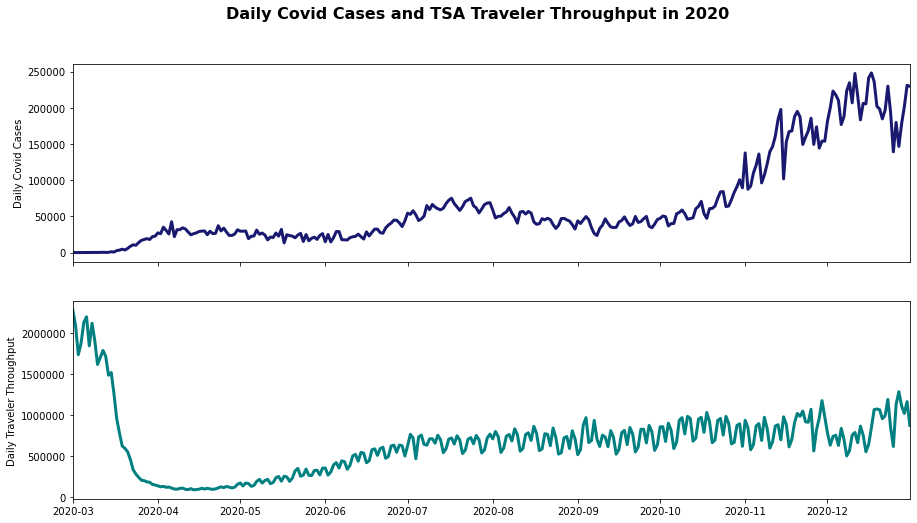

In [53]:
# plot daily results

x = tsa_df["Date"]
y1 = covid_df["New Cases"]
y2 = tsa_df["2020 Traveler Throughput"]

fig, (ax1, ax2) = plt.subplots(2, sharex=True,figsize=(15, 8))
fig.suptitle("Daily Covid Cases and TSA Traveler Throughput in 2020", fontsize=16, fontweight="bold")
ax1.plot(x, y1, linewidth=3, color = "midnightblue")
ax1.set_xlim(min(x), max(x))
ax1.set_ylabel("Daily Covid Cases")
ax2.plot(x, y2, linewidth=3, color="teal")
ax2.set_xlim(min(x), max(x))
ax2.set_yticks(np.arange(0,2500000, 500000))
ax2.set_yticklabels(np.arange(0,2500000, 500000))
ax2.set_ylabel("Daily Traveler Throughput")

print("Correlation coefficent between two y variables: " + str((st.pearsonr(y1,y2))[0]))

slope, ints, r, p, err = st.linregress(y1, y2)

fig.savefig("exports/traveldaily.png")
print(r)
print(p)


Correlation coefficent between two y variables: 0.24


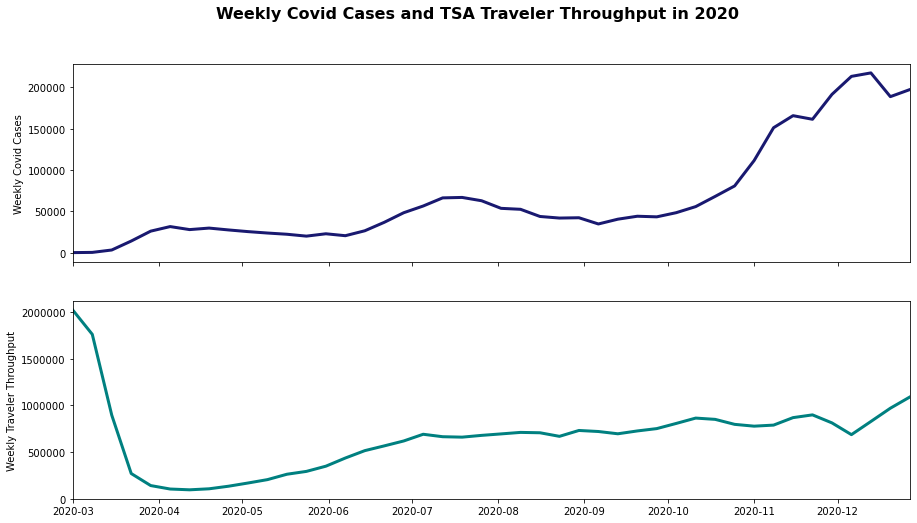

In [37]:
# plot weekly results

weekly_tsa_df = pd.DataFrame(tsa_df.groupby(["First Day of the Week"])["2020 Traveler Throughput"].mean())
weekly_tsa_df.reset_index(level=0, inplace=True)
weekly_tsa_df = weekly_tsa_df.sort_values(["First Day of the Week"], ascending=True)

weekly_covid_df = pd.DataFrame(covid_df.groupby(["First Day of the Week"])["New Cases"].mean())
weekly_covid_df.reset_index(level=0, inplace=True)
weekly_covid_df = weekly_covid_df.sort_values(["First Day of the Week"], ascending=True)

x = weekly_tsa_df["First Day of the Week"]
y1 = weekly_covid_df["New Cases"]
y2 = weekly_tsa_df["2020 Traveler Throughput"]

fig, (ax1, ax2) = plt.subplots(2, sharex=True,figsize=(15, 8))
fig.suptitle("Weekly Covid Cases and TSA Traveler Throughput in 2020", fontsize=16, fontweight="bold")
ax1.plot(x, y1, linewidth=3, color = "midnightblue")
ax1.set_xlim(min(x), max(x))
ax1.set_ylabel("Weekly Covid Cases")
ax2.plot(x, y2, linewidth=3, color="teal")
ax2.set_xlim(min(x), max(x))
ax2.set_yticks(np.arange(0,2500000, 500000))
ax2.set_yticklabels(np.arange(0,2500000, 500000))
ax2.set_ylabel("Weekly Traveler Throughput")

print("Correlation coefficent between two y variables: " + str(round((st.pearsonr(y1,y2))[0],2)))

fig.savefig("exports/travelweekly.png")
